In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-learning/language.csv


# The "lang" dataset is related to language learning and the abilities of individuals to learn and use languages, with a focus on the Dutch language in the context of the Netherlands.
### L1: Native language of the participant. (String)
### C: Country of origin of the participant. (String)
### L1L2: Linguistic similarity between the native language and the target language. (Integer)
### L1L2: Linguistic similarity between the native language and the target language. (Integer)
### AaA: Age at arrival in the Netherlands. (Integer)
### LoR: Length of residence in the Netherlands. (Integer)
### Edu.day: Formal education days in the target language. (Integer)
### Sex: Gender of the participant. (String)
### Family: Family status of the participant. (String)
### ISO639.3: ISO 639-3 codes for the target language. (String)
### Enroll: Duration enrolled in language courses. (Integer)
### Speaking: Speaking proficiency test score on the State Examination of Dutch as a Second Language. (Integer)
### morph: Morphological score related to knowledge structures within words. (Integer)
### lex: Lexicon score indicating understanding of written words. (Integer)
### new_feat: Feature score reflecting ability to acquire new sounds/grammatical structures. (Integer)
### new_sounds: Sound symbols score evaluating pronunciation. (Integer)

In [2]:
lang = pd.read_csv("/kaggle/input/language-learning/language.csv", encoding='iso-8859-1')
lang

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,NaN,0.010463,NaN,NaN
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,NaN,0.010463,NaN,NaN
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,NaN,0.010463,NaN,NaN
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,NaN,0.010463,NaN,NaN
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,NaN,0.010463,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50230,Yoruba,Nigeria,YorubaEnglish,English,29,8,3.0,Male,Niger-Congo,yor,35,514,0.2162,0.595079,25.0,22.0
50231,Yoruba,Nigeria,YorubaEnglish,English,28,2,4.0,Female,Niger-Congo,yor,35,505,0.2162,0.595079,25.0,22.0
50232,Yoruba,Nigeria,YorubaEnglish,English,27,12,3.0,Female,Niger-Congo,yor,35,502,0.2162,0.595079,25.0,22.0
50233,Yoruba,Nigeria,YorubaEnglish,English,26,2,3.0,Male,Niger-Congo,yor,35,426,0.2162,0.595079,25.0,22.0


In [3]:
lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


In [4]:
lang.describe()

,AaA,LoR,Edu.day,Enroll,Speaking,morph,lex,new_feat,new_sounds
count,50235.000000,50235.000000,50226.000000,50235.000000,50235.000000,48426.000000,50235.000000,48219.000000,48219.000000
mean,26.487648,3.923002,3.134213,81.147029,517.622275,0.050150,0.411063,14.468073,20.117049
std,7.245634,4.275746,0.855379,25.346411,37.917385,0.056546,0.189779,5.645576,3.602436
min,0.000000,0.000000,1.000000,8.000000,270.000000,-0.017100,0.010463,6.000000,13.000000
25%,22.000000,2.000000,3.000000,67.000000,494.000000,0.018300,0.388004,11.000000,19.000000
50%,26.000000,3.000000,3.000000,86.000000,516.000000,0.047900,0.398649,14.000000,21.000000
75%,30.000000,5.000000,4.000000,100.000000,540.000000,0.063800,0.595079,21.000000,23.000000
max,88.000000,59.000000,4.000000,148.000000,685.000000,0.326900,0.595079,32.000000,27.000000


In [5]:
lang['Edu.day']  =lang['Edu.day'].fillna(3)

In [6]:
lang['morph'] = lang['morph'].fillna(0.0501)
lang['new_feat'] = lang['new_feat'].fillna(14.4)
lang['new_sounds'] = lang['new_sounds'].fillna(20.1)
lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50235 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       50235 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    50235 non-null  float64
 15  new_sounds  50235 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


In [9]:
lang.drop_duplicates()

,L1,C,L1L2,L2,AaA,LoR,Edu.day,Sex,Family,ISO639.3,Enroll,Speaking,morph,lex,new_feat,new_sounds
0,Afrikaans,SouthAfrica,AfrikaansEnglish,English,25,0,4.0,Female,Indo-European,afr,93,496,0.0501,0.010463,14.4,20.1
1,Afrikaans,SouthAfrica,AfrikaansGerman,German,47,2,4.0,Male,Indo-European,afr,93,542,0.0501,0.010463,14.4,20.1
2,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,23,23,3.0,Female,Indo-European,afr,93,585,0.0501,0.010463,14.4,20.1
3,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,42,2,2.0,Female,Indo-European,afr,93,521,0.0501,0.010463,14.4,20.1
4,Afrikaans,SouthAfrica,AfrikaansMonolingual,Monolingual,22,19,3.0,Female,Indo-European,afr,93,639,0.0501,0.010463,14.4,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50230,Yoruba,Nigeria,YorubaEnglish,English,29,8,3.0,Male,Niger-Congo,yor,35,514,0.2162,0.595079,25.0,22.0
50231,Yoruba,Nigeria,YorubaEnglish,English,28,2,4.0,Female,Niger-Congo,yor,35,505,0.2162,0.595079,25.0,22.0
50232,Yoruba,Nigeria,YorubaEnglish,English,27,12,3.0,Female,Niger-Congo,yor,35,502,0.2162,0.595079,25.0,22.0
50233,Yoruba,Nigeria,YorubaEnglish,English,26,2,3.0,Male,Niger-Congo,yor,35,426,0.2162,0.595079,25.0,22.0


In [10]:
lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50235 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       50235 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    50235 non-null  float64
 15  new_sounds  50235 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


## 1. How do participants' length of residence in the Netherlands (column "LoR") and formal education days in the target language (column "Edu.day") relate to their speaking proficiency score (column "Speaking")?

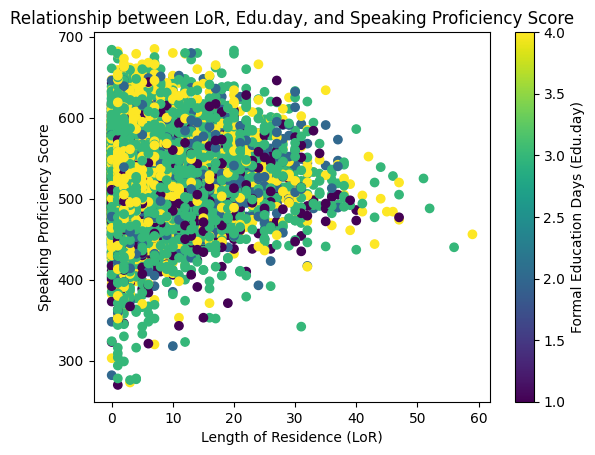

In [11]:
import matplotlib.pyplot as plt

# Select the relevant columns from the DataFrame
subset_lang = lang[["LoR", "Edu.day", "Speaking"]]

# Drop rows with missing values
subset_lang = subset_lang.dropna()

# Create a scatter plot of LoR vs. Speaking with color representing Edu.day
plt.scatter(subset_lang["LoR"], subset_lang["Speaking"], c=subset_lang["Edu.day"], cmap='viridis')
plt.xlabel("Length of Residence (LoR)")
plt.ylabel("Speaking Proficiency Score")
plt.colorbar(label="Formal Education Days (Edu.day)")
plt.title("Relationship between LoR, Edu.day, and Speaking Proficiency Score")
plt.show()

#### It seems that the length of residence is not a factor for the Speaking proficiency score but the Formal Education Days does seem to have an impact on Speaking efficiency score. Higher the 'Formal Education Days', better the Speaking score

## 2. Is there a significant difference in the speaking proficiency score (column "Speaking") between male and female participants (column "Sex")?

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


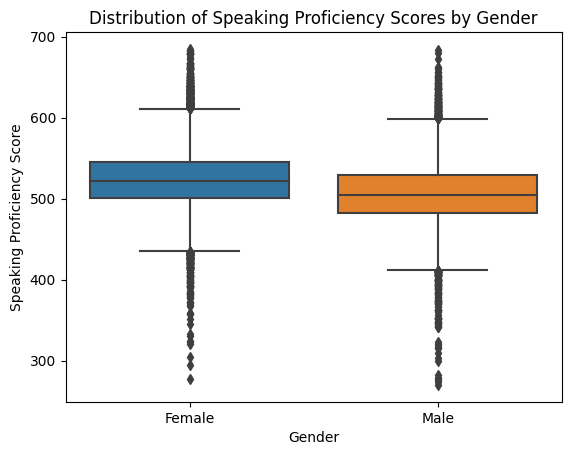

In [12]:
import seaborn as sns

# Select the relevant columns from the DataFrame
subset_lang = lang[["Sex", "Speaking"]]

# Create a box plot of Speaking scores by gender
sns.boxplot(x="Sex", y="Speaking", data=subset_lang)
plt.xlabel("Gender")
plt.ylabel("Speaking Proficiency Score")
plt.title("Distribution of Speaking Proficiency Scores by Gender")
plt.show()

#### From the graph, it could be said that the median value of Speaking Proficiency score is a bit higher for Females than Males, but there is not much significant difference between both of them as the values from different quartiles are similarly placed.

## 3. Is there a significant relationship between a participant's age at arrival in the Netherlands (column "AaA") and their length of residence (column "LoR")?

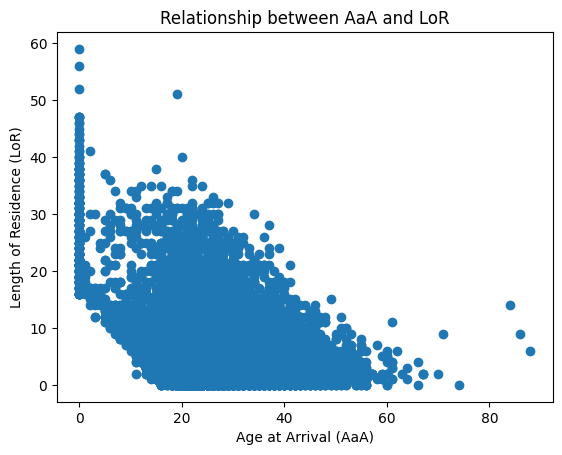

In [15]:
subset_lang = lang[["AaA", "LoR"]]

# Create a scatter plot of AaA vs. LoR
plt.scatter(subset_lang["AaA"], subset_lang["LoR"])
plt.xlabel("Age at Arrival (AaA)")
plt.ylabel("Length of Residence (LoR)")
plt.title("Relationship between AaA and LoR")
plt.show()

#### It is evident that AoA (Age of Arrival) was inversely proportional to the Length of Residence (LoR) for obvious reasons. Lower the age, higher the years they could reside in the country

## 4. How does enrollment duration (column "Enroll") relate to speaking proficiency score (column "Speaking") for participants with different levels of formal education in the target language (column "Edu.day")?

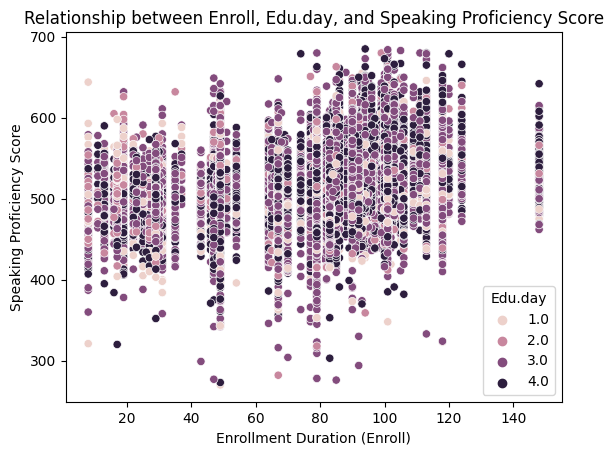

In [16]:
subset_lang = lang[["Enroll", "Speaking", "Edu.day"]]


# Create a scatter plot of Enroll vs. Speaking with hue representing Edu.day
sns.scatterplot(data=subset_lang, x="Enroll", y="Speaking", hue="Edu.day")
plt.xlabel("Enrollment Duration (Enroll)")
plt.ylabel("Speaking Proficiency Score")
plt.title("Relationship between Enroll, Edu.day, and Speaking Proficiency Score")
plt.show()

#### People with lower (Enrollment duration and Edu.day) tends to have higher Speaking Proficiency score and people with higher (Enrollment duration and Edu.day) tends to have higher Speaking Proficiency score. The people with lower Speaking Proficiency Score are the one's having Edu.day > 3 irrespective of Enrollment Duration, but there might be other factors affecting it